# hdf5

In [2]:
path_hdf5 = "betas_session01.hdf5"
#path_hdf5 = "/Volumes/Adityas_HDD 1/StableDiffusionReconstruction-main/nsd/nsddata_betas/ppdata/subj01/func1pt8mm/betas_assumehrf/betas_session03.hdf5"

In [3]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [4]:
file = h5py.File(path_hdf5, 'r')

In [5]:
for key in file.keys():
    print(key)

betas


In [6]:
import h5py

# Open the HDF5 file in read mode
file = h5py.File(path_hdf5, 'r')

# Explore the file structure
for key in file.keys():
    print(key)

# Access and read data from a specific dataset
dataset = file['betas']
data = dataset[()]
#print(data)
# Close the HDF5 file

# Now 'data' contains the contents of the dataset you've accessed


betas


In [7]:
data.shape

(750, 83, 104, 81)

In [8]:
slice_number = 40
time_point = 100

In [9]:
slice_data = data[time_point,:,:,slice_number]

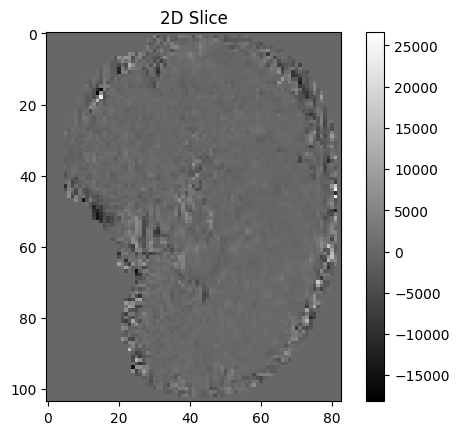

In [10]:
plt.imshow(slice_data.T, cmap='gray')  # Adjust the colormap as needed
plt.colorbar()
plt.title('2D Slice')
plt.show()

In [12]:
def print_hdf5_items(name, obj):
    if isinstance(obj, h5py.Group):
        print(f"Group: {name}")
    elif isinstance(obj, h5py.Dataset):
        print(f"Dataset: {name}")

file.visititems(print_hdf5_items)

Dataset: betas


## .nii files

In [13]:
path_nii = "betas_session01.nii.gz"

#paht_nii = "/Volumes/Adityas_HDD 1/StableDiffusionReconstruction-main/nsd/nsddata_betas/ppdata/subj01/func1pt8mm/betas_assumehrf/betas_session03.nii.gz"

In [14]:
import nibabel as nib


# Load a NIfTI file
img = nib.load(path_nii)


In [15]:
data_nii = img.get_fdata()

In [16]:
img.shape

(81, 104, 83, 750)

In [17]:
#print(data_nii)

In [18]:
  # Adjust this to the desired time point
slice_data_nii = img.dataobj[slice_number, : , : , time_point]


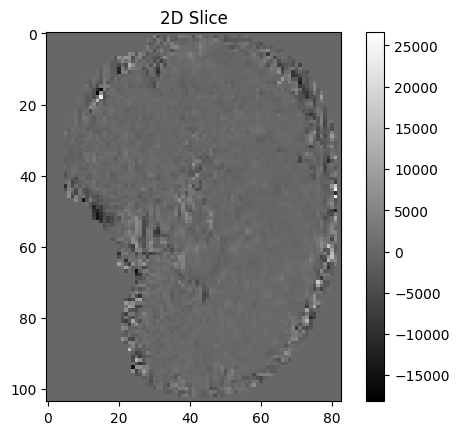

In [19]:
plt.imshow(slice_data_nii, cmap='gray')  # Adjust the colormap as needed
plt.colorbar()
plt.title('2D Slice')
plt.show()

### Check for same

In [18]:
data.shape

(750, 83, 104, 81)

In [19]:
data_nii.shape

(81, 104, 83, 750)

In [20]:
if np.array_equal(data.T, data_nii):
    print("dataset are the same")
else:
    print("dataset are different")

dataset are the same
